# Decision tree
In this example, we are still trying to predict the genre of a movie from the runtime, Metascore (average by professional reviewer) and ratings by users of IMDb. We are again using a modified [IMDB (Internet movie database) data set on movies](https://www.kaggle.com/nielspace/imdb-data).

In [6]:
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split #We need this to split the data

In [7]:
df = pd.read_csv('movies.csv')
df = df.dropna() #first get rid of rows with empty cells
df.head()

title  runtime  metascore  rating   genre
0   The Dark Knight      152       82.0     9.0  action
2         Inception      148       74.0     8.8  action
3      Interstellar      169       74.0     8.6   drama
4     Kimi no na wa      106       79.0     8.6   drama
5  The Intouchables      112       57.0     8.6  comedy

In [8]:
X = df[['runtime', 'metascore', 'rating']] #create the X matrix
y = df['genre'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [9]:
from sklearn.tree import DecisionTreeClassifier #the object class we need

dtree = DecisionTreeClassifier() #create the tree
dtree = dtree.fit(X_train, y_train) #fit the tree with the train data

We've now created the decision tree and fitted it on the data. Let's see what the tree looks like. For this, we need the library _graphviz_. 

**You will need to install this using two commands in Anaconda prompt:** 

_conda install graphviz_ 

and then

_conda install python-graphviz_

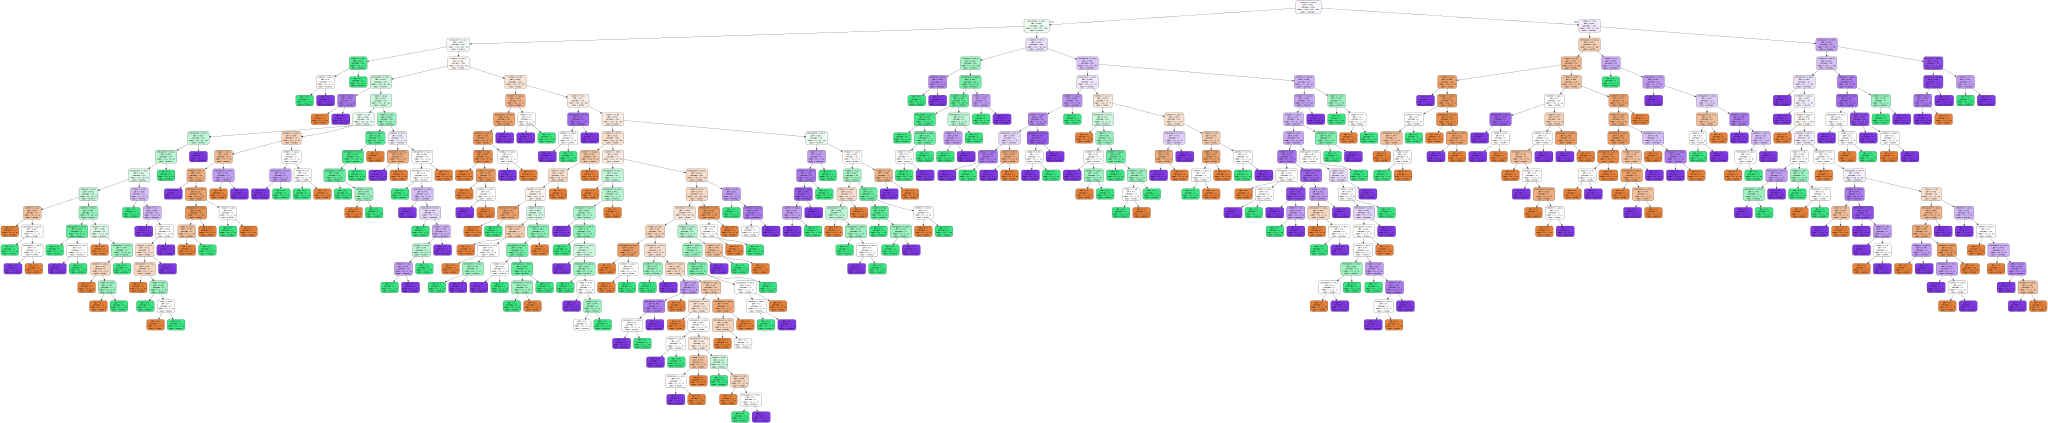

In [15]:
import graphviz #the library we need
from sklearn.tree import export_graphviz #we also need a function from sklearn to export the tree to the graphviz library

#This creates the data for the graph.
#out_file=None: do not create a file, but make a variable
#feature_names: give the variable names
#filled: make pretty colors in the graph
#rounded: make the edges round (even prettier)
#class_names: give the names of the target variable
graph_data = export_graphviz(dtree, out_file=None,
                      feature_names=X.columns.values,
                      filled=True, rounded=True,
                      class_names=['drama', 'action', 'comedy'])

graph = graphviz.Source(graph_data) #this creates the graph based on the data we just created
graph #show the graph

As you can see, you get a very unwieldly tree to look at (though it _might_ predict well as a model). We can improve the clarity for everyday use by tweaking the tree parameters. For example, we can set the `max_depth` at 2:

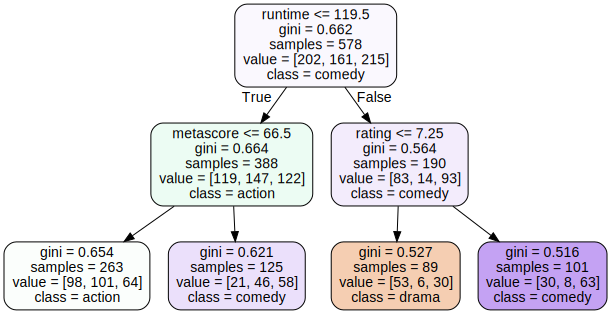

In [18]:
dtree = DecisionTreeClassifier(max_depth=2) #create the tree with max_depth = 2
dtree = dtree.fit(X_train, y_train) #fit the tree with the train data

graph_data = export_graphviz(dtree, out_file=None,
                      feature_names=X.columns.values,
                      filled=True, rounded=True,
                      class_names=['drama', 'action', 'comedy'])

graph = graphviz.Source(graph_data) #this creates the graph based on the data we just created
graph #show the graph

That's a lot clearer. How to read this:

* 1st line: the condition on which to split the node to the next branch
* 2nd line: gini coefficient, a measure for the "impurity" of the node. The higher, the more "impure".
* 3rd line: samples, number of cases left
* 4th line: counts per category in the following order: drama, action, comedy\n
* 5th line: most frequent category in the node

So if a movie is short (go left) and disliked by the critics (go left), it might be an action movie. Sounds about right!